## ***Walmart Business Analysis***

#### **Import Libraries** 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Import Raw Data**

In [10]:
df=pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/wallmart/Walmart dataset .csv")

print("Size Of Data :",df.shape)

Size Of Data : (10051, 11)


#### **Sample Data**

In [6]:
df.head(10)

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,05/01/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,08/03/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,03/03/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,08/02/19,10:37:00,Ewallet,5.3,0.48
5,6,WALM026,Denton,Electronic accessories,$85.39,7.0,25/03/19,18:30:00,Ewallet,4.1,0.48
6,7,WALM088,Cleburne,Electronic accessories,$68.84,6.0,25/02/19,14:36:00,Ewallet,5.8,0.33
7,8,WALM100,Canyon,Home and lifestyle,$73.56,10.0,24/02/19,11:38:00,Ewallet,8.0,0.18
8,9,WALM066,Grapevine,Health and beauty,$36.26,2.0,10/01/19,17:15:00,Credit card,7.2,0.33
9,10,WALM065,Texas City,Food and beverages,$54.84,3.0,20/02/19,13:27:00,Credit card,5.9,0.33


In [11]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


#### **Duplicates**

In [ ]:

df.duplicated().sum()

np.int64(51)

#### **Remove Duplicates**

In [20]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

In [21]:
print("Size Of Data :",df.shape)

Size Of Data : (10000, 11)


#### **Null Values**

In [22]:
df.isnull().sum()

invoice_id         0
Branch             0
City               0
category           0
unit_price        31
quantity          31
date               0
time               0
payment_method     0
rating             0
profit_margin      0
dtype: int64

#### **Remove Null Values**

In [23]:
#droppping all rows with missing records
df.dropna(inplace=True)

# verify
df.isnull().sum()

invoice_id        0
Branch            0
City              0
category          0
unit_price        0
quantity          0
date              0
time              0
payment_method    0
rating            0
profit_margin     0
dtype: int64

#### **Data Types**

In [24]:
df.dtypes

invoice_id          int64
Branch             object
City               object
category           object
unit_price         object
quantity          float64
date               object
time               object
payment_method     object
rating            float64
profit_margin     float64
dtype: object

#### **Convert datatypes object to float & object to datetime**

In [33]:
# Remove '$' and convert to float
df['unit_price'] = df['unit_price'].replace('[$,]', '', regex=True).astype(float)


# convert unit_price to float
df['unit_price'] = df['unit_price'].astype(float)

# convert date to datetime
df['date'] = pd.to_datetime(df['date'])



In [30]:
df.dtypes

invoice_id                 int64
Branch                    object
City                      object
category                  object
unit_price               float64
quantity                 float64
date              datetime64[ns]
time                      object
payment_method            object
rating                   float64
profit_margin            float64
day                        int32
month                      int32
year                       int32
hour                       int32
dtype: object

#### **Columns In DataSet**

In [39]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'day',
       'month', 'year', 'hour'],
      dtype='object')

#### **Add New Column**

In [40]:
df['total'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,day,month,year,hour,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,2019-05-01,13:08:00,Ewallet,9.1,0.48,1,5,2019,13,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,2019-08-03,10:29:00,Cash,9.6,0.48,3,8,2019,10,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,2019-03-03,13:23:00,Credit card,7.4,0.33,3,3,2019,13,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,2019-01-27,20:33:00,Ewallet,8.4,0.33,27,1,2019,20,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,2019-08-02,10:37:00,Ewallet,5.3,0.48,2,8,2019,10,604.17


In [47]:
df.columns = df.columns.str.lower()
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'day',
       'month', 'year', 'hour', 'total'],
      dtype='object')

In [53]:
df.to_csv('walmart_clean_dataset.csv', index=False)

### ***Problem Statements***
#### **1 . Analyze Payment Methods**


In [252]:
# Group by payment method

payment_summary = df.groupby('payment_method').agg(
    transactions=('invoice_id', 'nunique'),
    total_items_sold=('quantity', 'sum')).reset_index()
print(payment_summary)


  payment_method  transactions  total_items_sold
0           Cash          1832            4984.0
1    Credit card          4256            9567.0
2        Ewallet          3881            8932.0


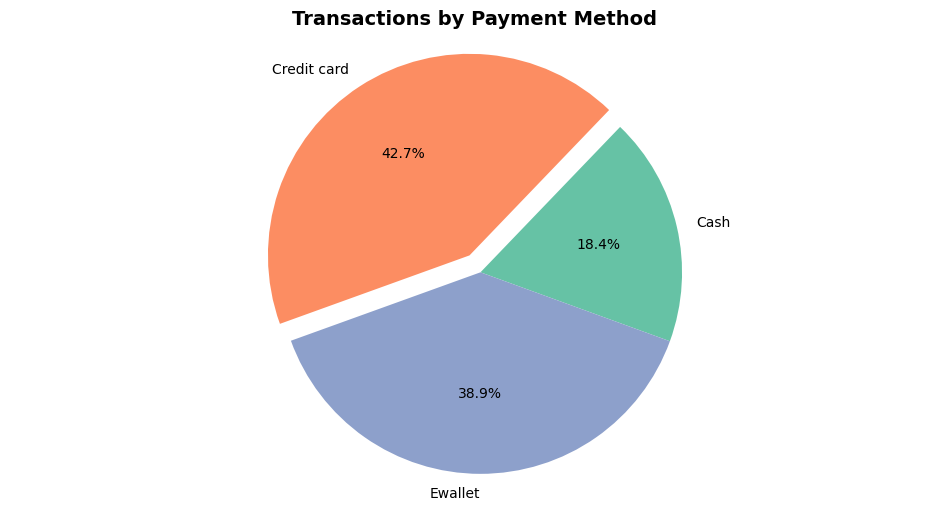

In [253]:
# Visualization

credit_index = payment_summary['payment_method'].tolist().index("Credit card")
explode = [0]*len(payment_summary['payment_method'])
explode[credit_index] = 0.1 
plt.figure(figsize=(12,6))
plt.pie(
    payment_summary['transactions'], 
    labels=payment_summary['payment_method'], 
    autopct='%1.1f%%',   
    startangle=340,
    explode=explode,
    colors=plt.cm.Set2.colors
)
plt.title('Transactions by Payment Method', fontsize=14, weight='bold')
plt.axis('equal') 
plt.show()



#### **2 . Calculate Total Quantity Sold by Payment Methods**


In [254]:
# Group by payment method and sum the quantity sold

payment_quantity = (
    df.groupby('payment_method')['quantity']
    .sum()
    .reset_index()
    .sort_values('quantity', ascending=False))
print(payment_quantity)


  payment_method  quantity
1    Credit card    9567.0
2        Ewallet    8932.0
0           Cash    4984.0


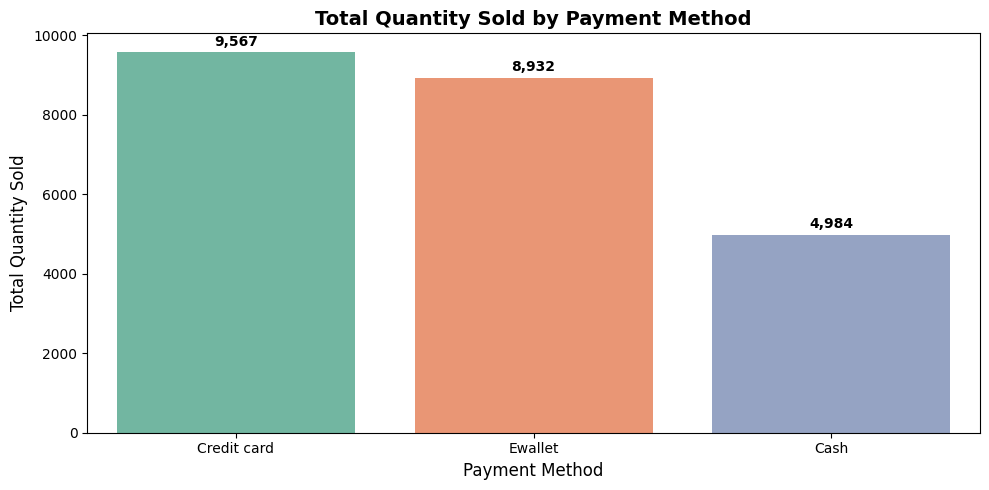

In [288]:
# Visualization

plt.figure(figsize=(10,5))
ax = sns.barplot(
    data=payment_quantity,
    x='payment_method',
    y='quantity',
    hue='payment_method', 
    palette='Set2',
    dodge=False,
    legend=False
)
# Add labels centered above each bar using bar patches
y_max = payment_quantity['quantity'].max()
offset = y_max * 0.01 

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2       
    y = p.get_height()                   
    label = f"{int(y):,}"                   
    ax.text(x, y + offset, label, ha='center', va='bottom', fontsize=10, weight='bold')
plt.title('Total Quantity Sold by Payment Method', fontsize=14, weight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.tight_layout()
plt.show()





#### **3 . Calculate total profit per category**


In [256]:
# Calculate total profit per category

profit_by_category = (
    df.groupby('category')['profit_margin']
      .sum()
      .reset_index()
      .rename(columns={'profit_margin': 'total_profit'})
      .sort_values('total_profit', ascending=False)
)

print(profit_by_category)


                 category  total_profit
4      Home and lifestyle       1783.50
1     Fashion accessories       1783.05
0  Electronic accessories        164.73
2      Food and beverages         69.66
5       Sports and travel         63.45
3       Health and beauty         60.84


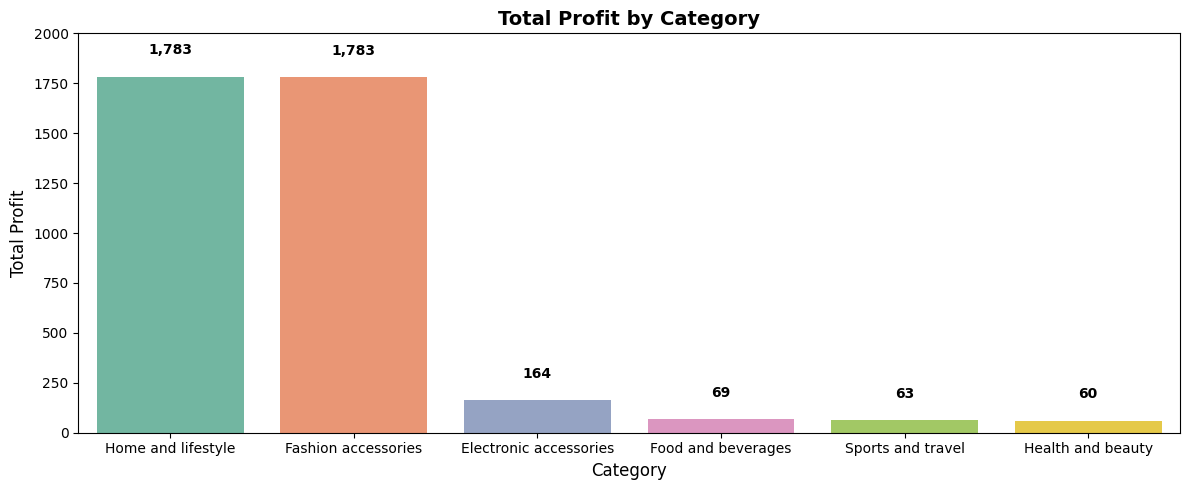

In [257]:
# Visualization

plt.figure(figsize=(12,5))
ax = sns.barplot(
    data=profit_by_category,
    x='category',
    y='total_profit',
    hue='category',     
    palette='Set2',
    dodge=False )

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2       # center x of the bar
    y = p.get_height()                      # height of the bar
    label = f"{int(y):,}"                   # format with comma thousands
    ax.text(x, y + offset, label, ha='center', va='bottom', fontsize=10, weight='bold')
    
plt.title('Total Profit by Category', fontsize=14, weight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.ylim(0, 2000)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


#### **4 . Analyze Sales Shifts Throughout the Day**

In [258]:
# Convert Time column to datetime format

df['Time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Define shift classification
def get_shift(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'
    
# Apply the shift classification
df['Shift'] = df['time'].apply(get_shift)

# Group by shift across all branches
shift_summary = (
    df.groupby('Shift')
      .size()
      .reset_index(name='Transactions')
      .sort_values('Transactions', ascending=False)
)
print(shift_summary)


       Shift  Transactions
0  Afternoon          4636
1    Evening          3246
2    Morning          2087


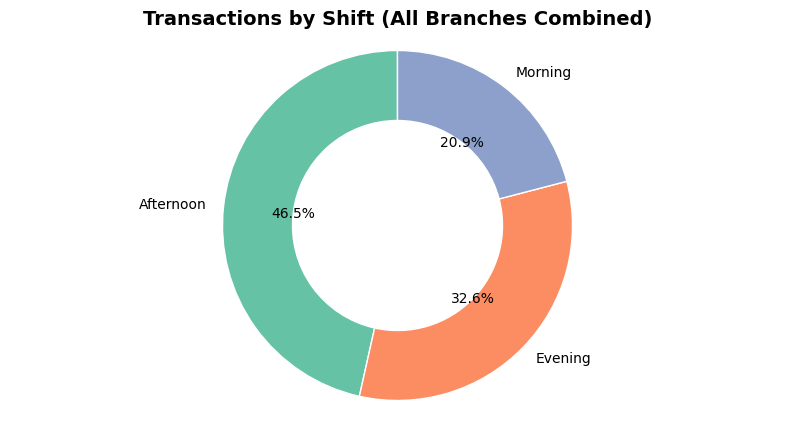

In [259]:
# Visualization: 
plt.figure(figsize=(10,5))
colors = plt.cm.Set2.colors

plt.pie(
    shift_summary['Transactions'],
    labels=shift_summary['Shift'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'}
)
plt.title("Transactions by Shift (All Branches Combined)", fontsize=14, weight='bold')
plt.axis('equal')
plt.show()


#### **5 . Time-Based Trends**

In [265]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create time-based columns
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q')

# Calculate Sales and Profit
df['Sales'] = df['unit_price'] * df['quantity']
df['Profit'] = df['Sales'] * df['profit_margin']


#### **Daily Trends**

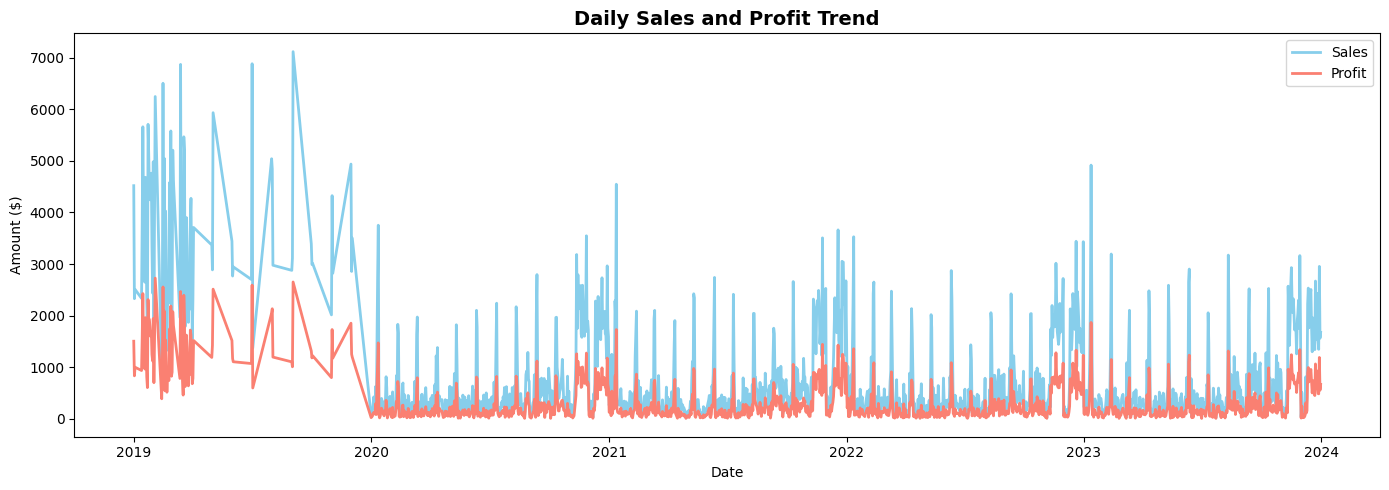

In [267]:
# Visualization:
daily_summary = df.groupby('date')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(14,5))
plt.plot(daily_summary['date'], daily_summary['Sales'], label='Sales', color='skyblue', linewidth=2)
plt.plot(daily_summary['date'], daily_summary['Profit'], label='Profit', color='salmon', linewidth=2)
plt.title('Daily Sales and Profit Trend', fontsize=14, weight='bold')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()


#### **Monthly Trends**

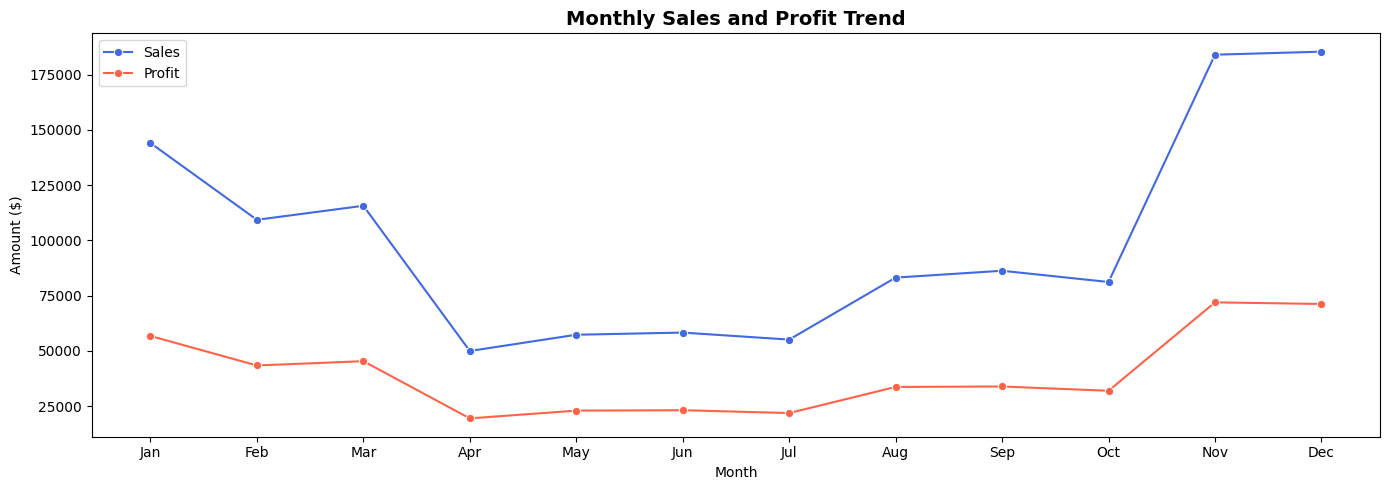

 Peak Sales Month: Dec ($185343.48)


In [ ]:
# Visualization:
monthly_summary = df.groupby('month')[['Sales', 'Profit']].sum().reset_index()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',  'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_summary['month_name'] = monthly_summary['month'].apply(lambda x: month_labels[x-1])
plt.figure(figsize=(14,5))
sns.lineplot(data=monthly_summary, x='month_name', y='Sales', label='Sales', marker='o', color='royalblue')
sns.lineplot(data=monthly_summary, x='month_name', y='Profit', label='Profit', marker='o', color='tomato')
plt.title('Monthly Sales and Profit Trend', fontsize=14, weight='bold')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Identify Peak Month ---
peak_month = monthly_summary.loc[monthly_summary['Sales'].idxmax()]
print(f" Peak Sales Month: {peak_month['month_name']} (${peak_month['Sales']:.2f})")


#### **Quarterly Trends**

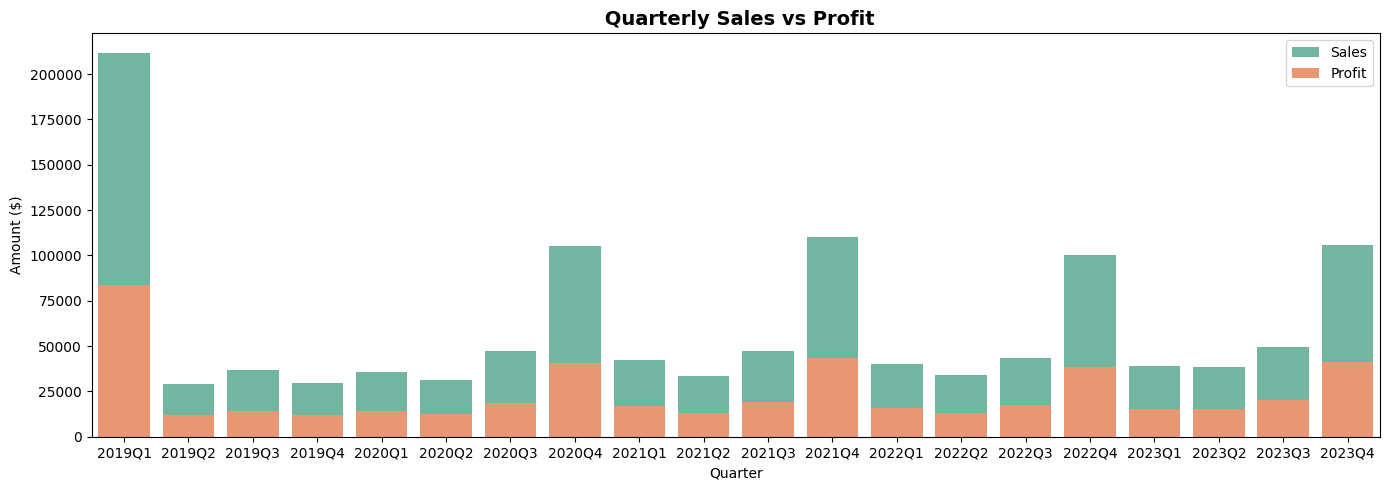

In [287]:
# Visualization:
quarterly_summary = df.groupby('quarter')[['Sales', 'Profit']].sum().reset_index()
plt.figure(figsize=(14,5))
sns.barplot(data=quarterly_summary, x='quarter', y='Sales', color='#66C2A5',  label='Sales')
sns.barplot(data=quarterly_summary, x='quarter', y='Profit', color='#FC8D62', label='Profit')
plt.title(' Quarterly Sales vs Profit', fontsize=14, weight='bold')
plt.xlabel('Quarter')
plt.ylabel('Amount ($)')
plt.legend()
plt.tight_layout()
plt.show()
